In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
file_path = "C:/Users/phili/OneDrive/Dokumente/LT21Sprengel.csv"
raw_data= pd.read_csv(file_path, delimiter=';', encoding='unicode_escape')
raw_data.rename(columns={'Wahlberechtigte': 'Wahlber.',
                         'gültige Stimmen': 'gült. Stimmen',
                         'abgegebene Stimmen': 'abg. Stimmen'},
                inplace=True) #abbreviate column names for comfort

In [3]:
"""Look at data"""
print(raw_data.head())
print(raw_data.describe())
print(raw_data.info()) #data is clean
print('All columns: ', raw_data.columns)
print(raw_data.dtypes.value_counts())
print('Shape: ', raw_data.shape)

   Wahl  Wahlsprengel  Wahlber.  abg. Stimmen  gült. Stimmen  ÖVP  FPÖ  SPÖ  \
0  LT21             1       500           312            306   72   31   53   
1  LT21             3       492           339            337   73   25   55   
2  LT21             4       563           370            363  112   28   52   
3  LT21             5       512           395            392  126   26   43   
4  LT21            20       547           378            374   73   26   78   

   GRÜNE  NEOS  MFG  KPÖ  BESTE  UBB  R  
0     75    35   20   19      1    0  0  
1    124    34   11    8      5    1  1  
2    109    31   28    3      0    0  0  
3    141    31   10   12      2    0  1  
4    126    33   15   18      5    0  0  
       Wahlsprengel    Wahlber.  abg. Stimmen  gült. Stimmen         ÖVP  \
count    237.000000  237.000000    237.000000     237.000000  237.000000   
mean     376.962025  566.130802    360.573840     351.194093   94.253165   
std      222.498645  115.450975    160.500937

In [4]:
"""Delete unnecessary columns"""
raw_data.drop('Wahl', axis=1, inplace=True) #Landtagswahl_21

total_valid_votes= raw_data['gült. Stimmen'].sum()
excluded_parties= [col for col in raw_data.columns if  raw_data[col].sum() / total_valid_votes < 0.05]
consolidated_data= raw_data.drop(excluded_parties, axis=1) #drop parties which received less than 5% of the votes
print('Selected columns: ', consolidated_data.columns)

Selected columns:  Index(['Wahlsprengel', 'Wahlber.', 'abg. Stimmen', 'gült. Stimmen', 'ÖVP',
       'FPÖ', 'SPÖ', 'GRÜNE', 'NEOS'],
      dtype='object')


In [5]:
"""Parties and their associated colors"""
Parties=['ÖVP', 'FPÖ', 'SPÖ', 'GRÜNE', 'NEOS']
party_colors=['turquoise','mediumblue','red', 'lawngreen', 'deeppink']
Party_color_dict=dict(zip(Parties, party_colors)) #useful if order of partys in a plot changes

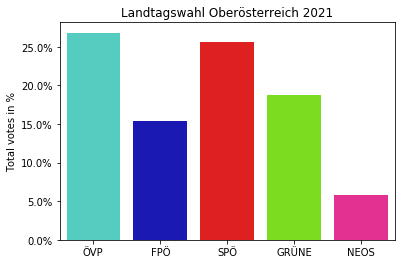

Election Results:  {'ÖVP': 0.2683791284706787, 'FPÖ': 0.15356889695193013, 'SPÖ': 0.25613638821140655, 'GRÜNE': 0.18823062967813248, 'NEOS': 0.05813799814977232}


In [6]:
"""Plots"""
#Results

Election_results_per_party= dict(zip(Parties, [consolidated_data[party].sum()/total_valid_votes for party in Parties]))

sns.barplot(x=list(Election_results_per_party.keys()), y=list(Election_results_per_party.values()),
            palette=party_colors)
plt.ylabel('Total votes in %')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title('Landtagswahl Oberösterreich 2021')
plt.show()
print('Election Results: ', Election_results_per_party)

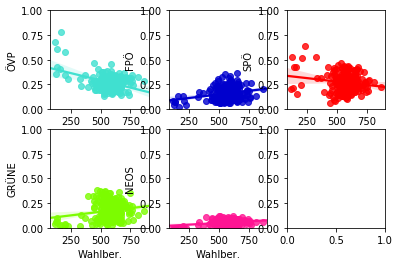

In [7]:
votes_in_rel_to_pop_size= consolidated_data.copy()
for party in Parties:
    votes_in_rel_to_pop_size[party]= votes_in_rel_to_pop_size[party]/votes_in_rel_to_pop_size['gült. Stimmen']


fig, axes = plt.subplots(2, 3)
for i in range(len(Parties)):
    if i<=2:
        sns.regplot(x=votes_in_rel_to_pop_size['Wahlber.'], y=votes_in_rel_to_pop_size[Parties[i]], ax= axes[0,i],
                    color=party_colors[i])
        axes[0,i].set(ylim=(0,1))
    else:
        sns.regplot(x=votes_in_rel_to_pop_size['Wahlber.'], y=votes_in_rel_to_pop_size[Parties[i]], ax=axes[1,i-3],
                    color=party_colors[i])
        axes[1,i-3].set(ylim=(0,1))

plt.show()

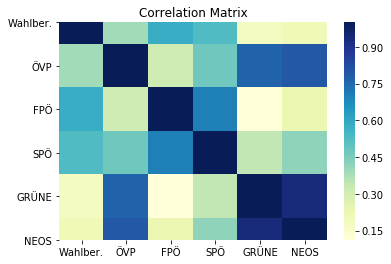

In [8]:
corr_matrix= consolidated_data[['Wahlber.',
                                'ÖVP', 'FPÖ', 'SPÖ', 'GRÜNE', 'NEOS']].corr(method='pearson')
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

Wahlsprengel won per party:  {'SPÖ': 99, 'ÖVP': 95, 'GRÜNE': 35, 'FPÖ': 8, 'NEOS': 0}


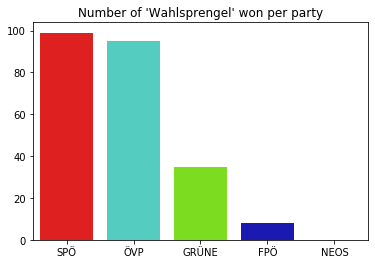

In [9]:
"""How many 'Wahlsprengel' could each party win?"""
no_of_Wahlsp_won = consolidated_data.copy()
no_of_Wahlsp_won['Winner']= no_of_Wahlsp_won[Parties].idxmax(axis=1) #get party with most votes per Wahlsprengel

wins_per_party = dict(no_of_Wahlsp_won['Winner'].value_counts())
for party in Parties:
    if not party in wins_per_party.keys():
        wins_per_party[party]= 0
print('Wahlsprengel won per party: ', wins_per_party)

sns.barplot(x=list(wins_per_party.keys()), y=list(wins_per_party.values()),
            palette=Party_color_dict)
plt.title("Number of 'Wahlsprengel' won per party")
plt.show()